# IA5008: Sistemas neuronales
## Assignment 5
Professor: Dr. Leonardo Chang Fernández    

# Classification with CNNs on CIFAR10

## Instructions

Let's face a more serious classification problem. Called CIFAR10, this dataset is used as a benchmark, demonstrating how a new model outperforms its predecessors and establish itself as the state of the art of classification models.

We will see how even with a deeper and more powerful network the result is much lower than in the MNIST dataset, since the problem is more difficult. The CIFAR10 dataset consists of 50,000 RGB images of 32 x 32 pixels, divided into 10 categories.

- Adjust the following hyperparameters:
    - Number and type of layers
    - Number of filters
    - Filter size
    - Dropout
    - etc.
- Discuss the effect of these hyperparameters in the performance of classification.


In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
from keras import models, layers
import os

Using TensorFlow backend.
/home/guby/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/guby/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/guby/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/guby/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [2]:
num_classes = 10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
#
# Put your model definition HERE
#
from keras import models, layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(10, activation='softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)            

In [8]:
#compile model (1st optimisator)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Train with a different optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
history1 = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_data=(x_test, y_test), shuffle=True)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 124s 2ms/step - loss: 1.7336 - accuracy: 0.3574 - val_loss: 1.2500 - val_accuracy: 0.5631
Epoch 2/6
50000/50000 [==============================] - 129s 3ms/step - loss: 1.2719 - accuracy: 0.5490 - val_loss: 1.0586 - val_accuracy: 0.6210
Epoch 3/6
50000/50000 [==============================] - 124s 2ms/step - loss: 1.1018 - accuracy: 0.6165 - val_loss: 0.9347 - val_accuracy: 0.6719
Epoch 4/6
50000/50000 [==============================] - 125s 2ms/step - loss: 0.9827 - accuracy: 0.6624 - val_loss: 0.8891 - val_accuracy: 0.7000
Epoch 5/6
50000/50000 [==============================] - 125s 3ms/step - loss: 0.9011 - accuracy: 0.6944 - val_loss: 0.8399 - val_accuracy: 0.7092
Epoch 6/6
10000/10000 [==============================] - 5s 545us/step
Test loss: 0.8231784067153931
Test accuracy: 0.7195000052452087


In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [11]:
history2 = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 60s 1ms/step - loss: 1.8425 - accuracy: 0.3180 - val_loss: 1.3820 - val_accuracy: 0.4985
Epoch 2/6
50000/50000 [==============================] - 58s 1ms/step - loss: 1.4612 - accuracy: 0.4729 - val_loss: 1.2774 - val_accuracy: 0.5556
Epoch 3/6
50000/50000 [==============================] - 59s 1ms/step - loss: 1.3090 - accuracy: 0.5356 - val_loss: 1.1874 - val_accuracy: 0.5833
Epoch 4/6
50000/50000 [==============================] - 56s 1ms/step - loss: 1.2129 - accuracy: 0.5762 - val_loss: 1.0569 - val_accuracy: 0.6363
Epoch 5/6
50000/50000 [==============================] - 61s 1ms/step - loss: 1.1471 - accuracy: 0.6035 - val_loss: 1.0011 - val_accuracy: 0.6562
Epoch 6/6
50000/50000 [==============================] - 70s 1ms/step - loss: 1.0851 - accuracy: 0.6246 - val_loss: 0.9911 - val_accuracy: 0.6541


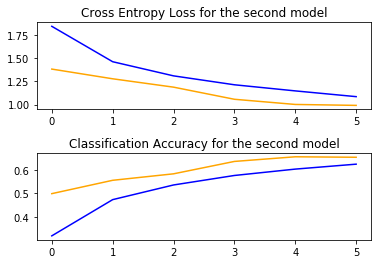

In [22]:
fig = plt.figure()
plt.subplot(211)
plt.title('Cross Entropy Loss for the second model')
plt.plot(history2.history['loss'], color='blue', label='train')

plt.plot(history2.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for the second model')
plt.plot(history2.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['val_accuracy'], color='orange', label='test')
fig.subplots_adjust(hspace=0.5)

In [5]:
#conv = 32, 16, 8, 4, 2, 
#fully connected = 128, 256, 512, 1024, 10

from keras import models, layers
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 512)        

In [28]:
history3 = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 241s 5ms/step - loss: 2.3466 - accuracy: 0.1573 - val_loss: 2.5423 - val_accuracy: 0.1378
Epoch 2/6
50000/50000 [==============================] - 251s 5ms/step - loss: 2.0886 - accuracy: 0.1757 - val_loss: 2.6166 - val_accuracy: 0.1690
Epoch 3/6
50000/50000 [==============================] - 278s 6ms/step - loss: 2.0333 - accuracy: 0.1810 - val_loss: 3.2048 - val_accuracy: 0.0993
Epoch 4/6
50000/50000 [==============================] - 285s 6ms/step - loss: 1.9824 - accuracy: 0.1869 - val_loss: 2.0781 - val_accuracy: 0.1751
Epoch 5/6
50000/50000 [==============================] - 298s 6ms/step - loss: 1.9551 - accuracy: 0.1932 - val_loss: 2.0473 - val_accuracy: 0.1713
Epoch 6/6
50000/50000 [==============================] - 282s 6ms/step - loss: 1.9091 - accuracy: 0.2132 - val_loss: 1.9159 - val_accuracy: 0.2086


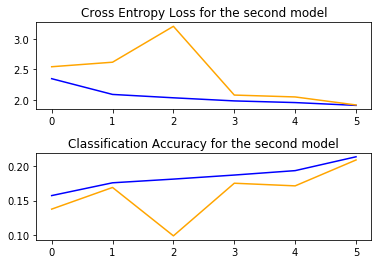

In [29]:
fig = plt.figure()
plt.subplot(211)
plt.title('Cross Entropy Loss for the second model')
plt.plot(history3.history['loss'], color='blue', label='train')

plt.plot(history3.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for the second model')
plt.plot(history3.history['accuracy'], color='blue', label='train')
plt.plot(history3.history['val_accuracy'], color='orange', label='test')
fig.subplots_adjust(hspace=0.5)

In [6]:
#conv = 64, 128, 256
#fully connected = 128, 256, 512, 10
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

In [33]:
history4 = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 123s 2ms/step - loss: 2.3327 - accuracy: 0.1517 - val_loss: 2.7505 - val_accuracy: 0.0998
Epoch 2/6
50000/50000 [==============================] - 126s 3ms/step - loss: 2.0789 - accuracy: 0.1727 - val_loss: 2.3381 - val_accuracy: 0.1091
Epoch 3/6
50000/50000 [==============================] - 125s 3ms/step - loss: 2.0393 - accuracy: 0.1777 - val_loss: 2.1679 - val_accuracy: 0.1440
Epoch 4/6
50000/50000 [==============================] - 130s 3ms/step - loss: 2.0120 - accuracy: 0.1807 - val_loss: 2.3100 - val_accuracy: 0.1112
Epoch 5/6
50000/50000 [==============================] - 126s 3ms/step - loss: 1.9643 - accuracy: 0.1845 - val_loss: 2.1198 - val_accuracy: 0.1513
Epoch 6/6
50000/50000 [==============================] - 126s 3ms/step - loss: 1.9131 - accuracy: 0.1978 - val_loss: 2.2019 - val_accuracy: 0.1949


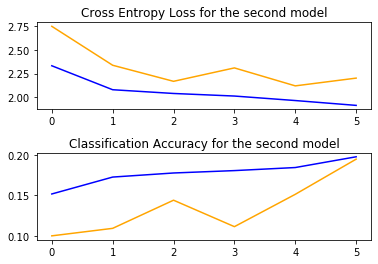

In [34]:
fig = plt.figure()
plt.subplot(211)
plt.title('Cross Entropy Loss for the second model')
plt.plot(history4.history['loss'], color='blue', label='train')

plt.plot(history4.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for the second model')
plt.plot(history4.history['accuracy'], color='blue', label='train')
plt.plot(history4.history['val_accuracy'], color='orange', label='test')
fig.subplots_adjust(hspace=0.5)

In [7]:
#conv = 64, 128, 256
#fully connected = 128, 256, 512, 10
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)             

In [8]:
history4 = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_data=(x_test, y_test), shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 53s 1ms/step - loss: 2.2054 - accuracy: 0.1866 - val_loss: 1.8937 - val_accuracy: 0.2779
Epoch 2/6
50000/50000 [==============================] - 55s 1ms/step - loss: 2.0005 - accuracy: 0.2226 - val_loss: 1.8514 - val_accuracy: 0.2682
Epoch 3/6
50000/50000 [==============================] - 52s 1ms/step - loss: 1.9095 - accuracy: 0.2456 - val_loss: 1.8864 - val_accuracy: 0.2755
Epoch 4/6
50000/50000 [==============================] - 51s 1ms/step - loss: 1.8618 - accuracy: 0.2681 - val_loss: 1.7684 - val_accuracy: 0.3341
Epoch 5/6
50000/50000 [==============================] - 51s 1ms/step - loss: 1.8096 - accuracy: 0.2843 - val_loss: 1.7781 - val_accuracy: 0.3226
Epoch 6/6
50000/50000 [==============================] - 56s 1ms/step - loss: 1.7092 - accuracy: 0.3201 - val_loss: 1.5541 - val_accuracy: 0.4057


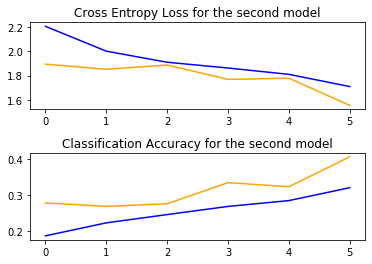

In [9]:
fig = plt.figure()
plt.subplot(211)
plt.title('Cross Entropy Loss for the second model')
plt.plot(history4.history['loss'], color='blue', label='train')

plt.plot(history4.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for the second model')
plt.plot(history4.history['accuracy'], color='blue', label='train')
plt.plot(history4.history['val_accuracy'], color='orange', label='test')
fig.subplots_adjust(hspace=0.5)

In [10]:
#conv = 64, 128, 256
#fully connected = 128, 256, 512, 10
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               524416    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)              

In [11]:
history5 = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 49s 973us/step - loss: 2.0836 - accuracy: 0.2261 - val_loss: 1.6618 - val_accuracy: 0.3999
Epoch 2/6
50000/50000 [==============================] - 46s 917us/step - loss: 1.7045 - accuracy: 0.3474 - val_loss: 1.4335 - val_accuracy: 0.4924
Epoch 3/6
50000/50000 [==============================] - 48s 957us/step - loss: 1.5618 - accuracy: 0.4094 - val_loss: 1.4295 - val_accuracy: 0.4836
Epoch 4/6
50000/50000 [==============================] - 47s 947us/step - loss: 1.4346 - accuracy: 0.4706 - val_loss: 1.2082 - val_accuracy: 0.5618
Epoch 5/6
50000/50000 [==============================] - 53s 1ms/step - loss: 1.3640 - accuracy: 0.5076 - val_loss: 1.1535 - val_accuracy: 0.6019
Epoch 6/6
50000/50000 [==============================] - 49s 985us/step - loss: 1.3233 - accuracy: 0.5236 - val_loss: 1.1712 - val_accuracy: 0.5848


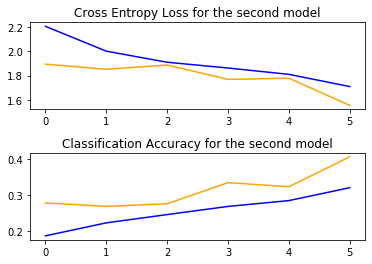

In [12]:
fig = plt.figure()
plt.subplot(211)
plt.title('Cross Entropy Loss for the second model')
plt.plot(history4.history['loss'], color='blue', label='train')

plt.plot(history4.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for the second model')
plt.plot(history4.history['accuracy'], color='blue', label='train')
plt.plot(history4.history['val_accuracy'], color='orange', label='test')
fig.subplots_adjust(hspace=0.5)

In [13]:
#conv = 64, 128, 256
#fully connected = 128, 256, 512, 10
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)              

In [14]:
history6 = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 61s 1ms/step - loss: 1.9396 - accuracy: 0.2934 - val_loss: 1.5249 - val_accuracy: 0.4349
Epoch 2/6
50000/50000 [==============================] - 59s 1ms/step - loss: 1.5423 - accuracy: 0.4311 - val_loss: 1.2784 - val_accuracy: 0.5398
Epoch 3/6
50000/50000 [==============================] - 69s 1ms/step - loss: 1.3776 - accuracy: 0.4979 - val_loss: 1.2204 - val_accuracy: 0.5531
Epoch 4/6
50000/50000 [==============================] - 63s 1ms/step - loss: 1.2710 - accuracy: 0.5494 - val_loss: 1.1332 - val_accuracy: 0.6002
Epoch 5/6
50000/50000 [==============================] - 60s 1ms/step - loss: 1.2075 - accuracy: 0.5742 - val_loss: 1.0190 - val_accuracy: 0.6520
Epoch 6/6
50000/50000 [==============================] - 63s 1ms/step - loss: 1.1537 - accuracy: 0.5959 - val_loss: 1.0968 - val_accuracy: 0.6093


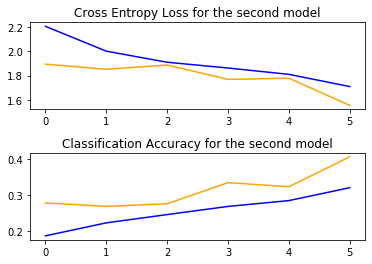

In [15]:
fig = plt.figure()
plt.subplot(211)
plt.title('Cross Entropy Loss for the second model')
plt.plot(history6.history['loss'], color='blue', label='train')

plt.plot(history6.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for the second model')
plt.plot(history6.history['accuracy'], color='blue', label='train')
plt.plot(history6.history['val_accuracy'], color='orange', label='test')
fig.subplots_adjust(hspace=0.5)

In [18]:
#conv = 64, 128, 256
#fully connected = 128, 256, 512, 10
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4096)             

In [19]:
history7 = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 133s 3ms/step - loss: 2.1323 - accuracy: 0.2125 - val_loss: 2.1024 - val_accuracy: 0.2055
Epoch 2/6
50000/50000 [==============================] - 128s 3ms/step - loss: 1.9421 - accuracy: 0.2570 - val_loss: 2.1439 - val_accuracy: 0.2308
Epoch 3/6
50000/50000 [==============================] - 139s 3ms/step - loss: 1.8203 - accuracy: 0.3065 - val_loss: 1.7698 - val_accuracy: 0.3292
Epoch 4/6
50000/50000 [==============================] - 147s 3ms/step - loss: 1.7313 - accuracy: 0.3416 - val_loss: 1.5454 - val_accuracy: 0.4507
Epoch 5/6
50000/50000 [==============================] - 142s 3ms/step - loss: 1.7968 - accuracy: 0.3235 - val_loss: 1.5179 - val_accuracy: 0.4588
Epoch 6/6
50000/50000 [==============================] - 133s 3ms/step - loss: 1.5920 - accuracy: 0.4106 - val_loss: 1.3659 - val_accuracy: 0.5116


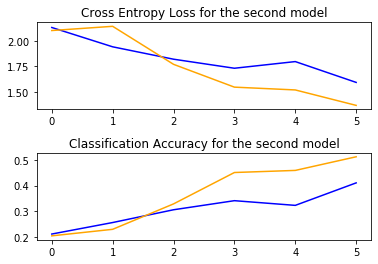

In [23]:
fig = plt.figure()
plt.subplot(211)
plt.title('Cross Entropy Loss for the second model')
plt.plot(history7.history['loss'], color='blue', label='train')

plt.plot(history7.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for the second model')
plt.plot(history7.history['accuracy'], color='blue', label='train')
plt.plot(history7.history['val_accuracy'], color='orange', label='test')
fig.subplots_adjust(hspace=0.5)

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4096)            

In [25]:
history8 = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 151s 3ms/step - loss: 1.6100 - accuracy: 0.4074 - val_loss: 1.1435 - val_accuracy: 0.5885
Epoch 2/6
50000/50000 [==============================] - 151s 3ms/step - loss: 1.1597 - accuracy: 0.5928 - val_loss: 0.9879 - val_accuracy: 0.6540
Epoch 3/6
50000/50000 [==============================] - 141s 3ms/step - loss: 0.9774 - accuracy: 0.6643 - val_loss: 0.8930 - val_accuracy: 0.6922
Epoch 4/6
50000/50000 [==============================] - 147s 3ms/step - loss: 0.8648 - accuracy: 0.7057 - val_loss: 0.8582 - val_accuracy: 0.7043
Epoch 5/6
50000/50000 [==============================] - 133s 3ms/step - loss: 0.7785 - accuracy: 0.7352 - val_loss: 0.7716 - val_accuracy: 0.7360
Epoch 6/6
50000/50000 [==============================] - 138s 3ms/step - loss: 0.7109 - accuracy: 0.7579 - val_loss: 0.7678 - val_accuracy: 0.7436


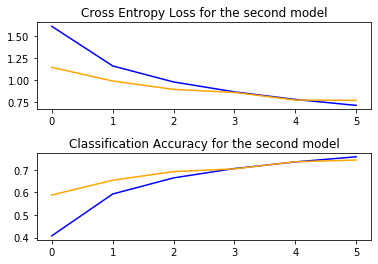

In [26]:
fig = plt.figure()
plt.subplot(211)
plt.title('Cross Entropy Loss for the second model')
plt.plot(history8.history['loss'], color='blue', label='train')
plt.plot(history8.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for the second model')
plt.plot(history8.history['accuracy'], color='blue', label='train')
plt.plot(history8.history['val_accuracy'], color='orange', label='test')
fig.subplots_adjust(hspace=0.5)